# Ulykkesanalyse per Tidspunkt
Denne notebooken analyserer ulykkesdata basert på tidspunkt på døgnet, måned, kommune og år. basert på datasettene fra Statens vegvesen.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Les inn data med riktig encoding og separator
df = pd.read_csv("Ulykke_med_time.csv", encoding="ISO-8859-1", delimiter=";")

# Definer kolonner med tidspunkt
time_columns = [
    "Morgenrush 07:00-08:59",
    "Formiddag 09:00-14:59",
    "Ettermiddagrush 15:00-17:59",
    "Kveld 18:00-23:59",
    "Natt 00:00-06:59"
]


## Analyse 1: Totalt antall ulykker etter tidspunkt på døgnet

C:\Users\ofssuksr\AppData\Local\Temp\ipykernel_13520\2347667413.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_by_time_df, x="Tidspunkt", y="Antall ulykker", palette="viridis")


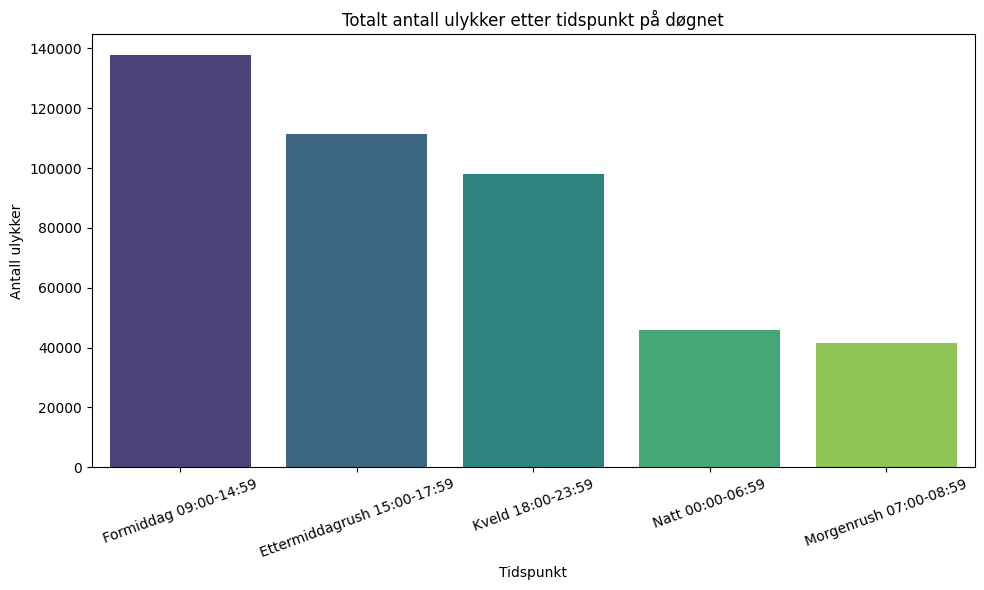

In [15]:
total_by_time = df[time_columns].sum().sort_values(ascending=False)
total_by_time_df = total_by_time.reset_index()
total_by_time_df.columns = ["Tidspunkt", "Antall ulykker"]

plt.figure(figsize=(10, 6))
sns.barplot(data=total_by_time_df, x="Tidspunkt", y="Antall ulykker", palette="viridis")
plt.title("Totalt antall ulykker etter tidspunkt på døgnet")
plt.ylabel("Antall ulykker")
plt.xlabel("Tidspunkt")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()



### Analyse 1: Totalt antall ulykker etter tidspunkt på døgnet

**Observasjon:**
- Det er overraskende at **formiddagen** har flest ulykker – dette kan indikere at ikke bare rushtrafikk, men også hverdagstrafikk med varetransport, eldre, og skoletrafikk bidrar til ulykkene.
- **Morgenrush** har færrest ulykker, noe som kan være pga. lavere fart eller mer fokusert kjøring i starten av dagen.
- **Nattulykker** er også færre, men de kan ofte være mer alvorlige – det bør vi analysere nærmere.


## Analyse 2: Antall ulykker per måned

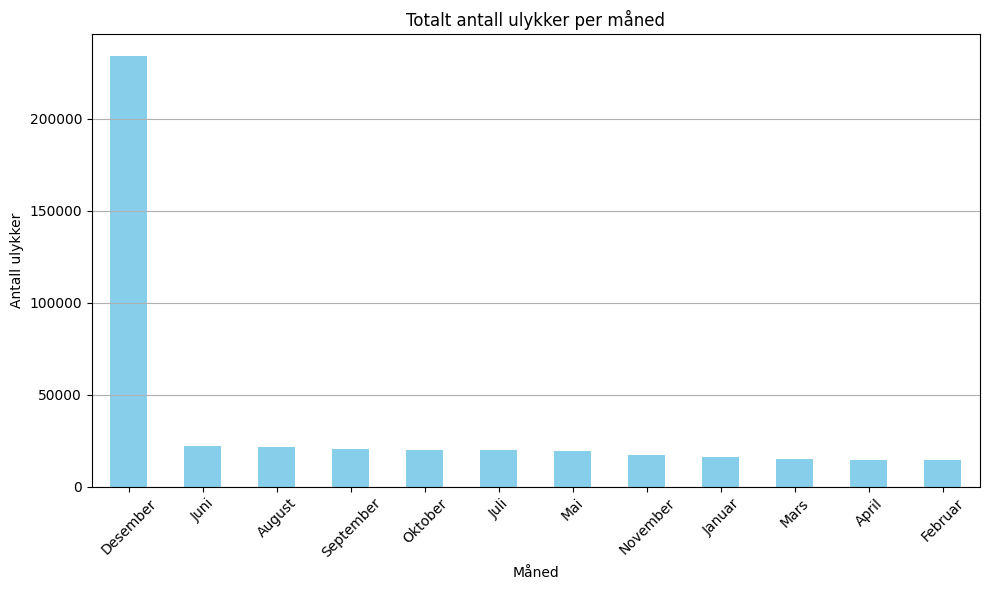

In [8]:
monthly_summary = df.groupby("Måned")[time_columns].sum()
monthly_summary["Totalt"] = monthly_summary.sum(axis=1)
monthly_summary_sorted = monthly_summary.sort_values("Totalt", ascending=False)

monthly_summary_sorted["Totalt"].plot(kind="bar", figsize=(10,6), color="skyblue")
plt.title("Totalt antall ulykker per måned")
plt.ylabel("Antall ulykker")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


### Analyse 2: Ulykker per måned

**Observasjon:**
- **Desember** har desidert flest ulykker, etterfulgt av sensommer og høstmåneder (september, oktober).

**Tolkning:**
- Desember peker seg ut sannsynligvis på grunn av:
  - Glatte veier (snø/is)
  - Økt trafikk før jul
  - Dårligere sikt og lysforhold
- Lavere tall i sommermånedene (juni/juli) kan skyldes ferie og mindre trafikk.

## Analyse 3: Topp 10 kommuner med flest ulykker

C:\Users\ofssuksr\AppData\Local\Temp\ipykernel_13520\1691299383.py:10: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ofssuksr\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


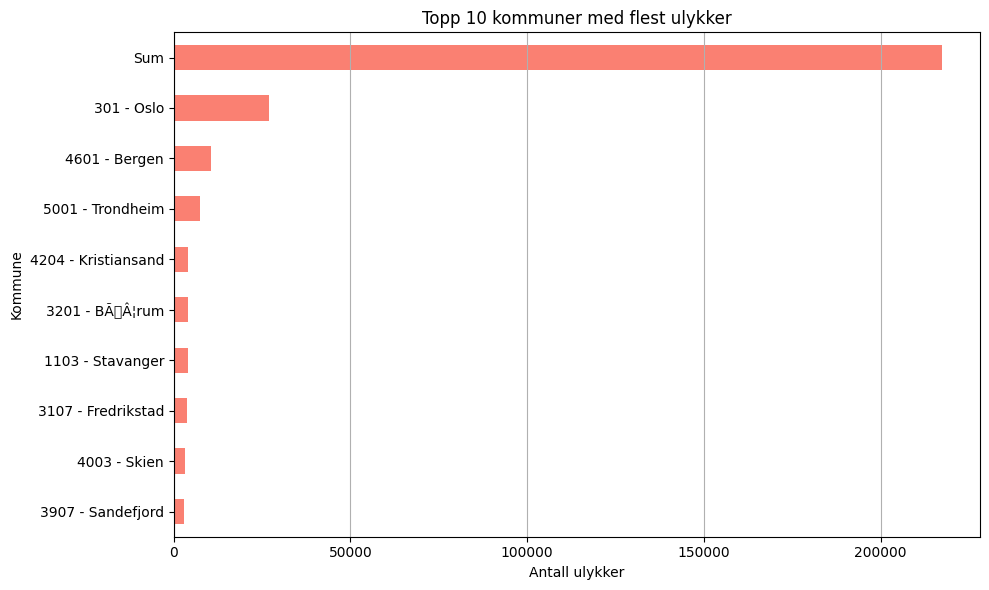

In [9]:
kommune_summary = df.groupby("Kommune")[time_columns].sum()
kommune_summary["Totalt"] = kommune_summary.sum(axis=1)
top_kommuner = kommune_summary.sort_values("Totalt", ascending=False).head(10)

top_kommuner["Totalt"].plot(kind="barh", figsize=(10,6), color="salmon")
plt.title("Topp 10 kommuner med flest ulykker")
plt.xlabel("Antall ulykker")
plt.gca().invert_yaxis()
plt.grid(axis="x")
plt.tight_layout()
plt.show()


### Analyse 3: Topp kommuner med flest ulykker

**Observasjon:**
- Stor variasjon i antall ulykker mellom kommuner.
- De største kommunene (f.eks. Oslo, Bergen, Trondheim) dominerer.

**Tolkning:**
- Flere ulykker i tett befolkede områder og byer er forventet på grunn av mer trafikk.
- Kommuner med høy trafikkbelastning eller gjennomfartsårer kan ha uforholdsmessig mange ulykker.

## Analyse 4: Årlig utvikling i antall ulykker

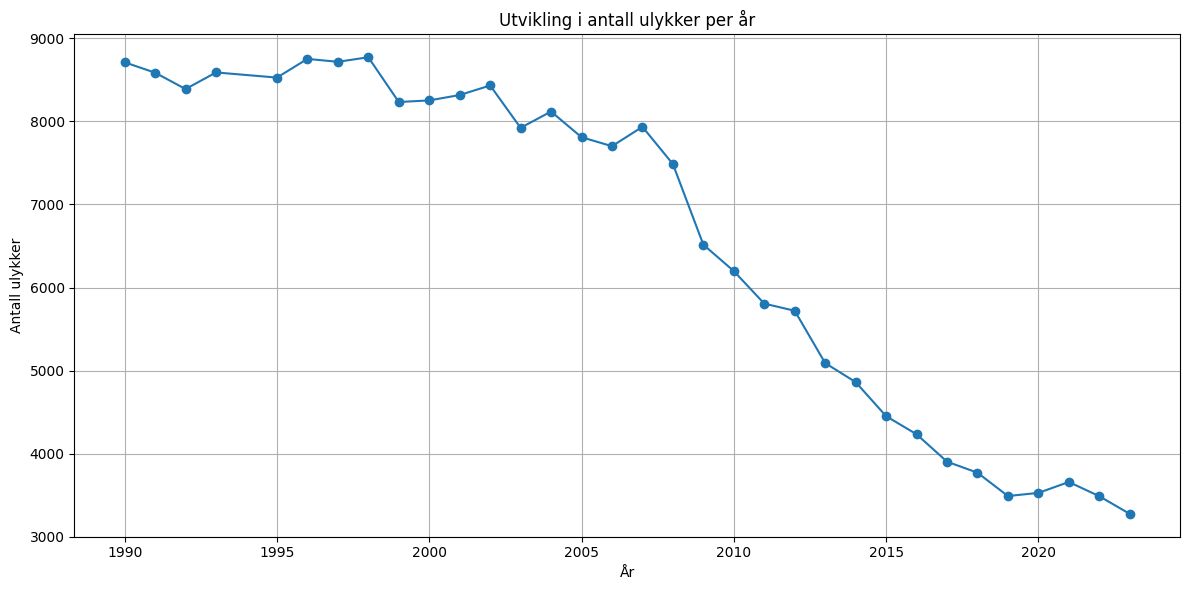

In [10]:
yearly_summary = df.dropna(subset=["År"]).groupby("År")[time_columns].sum()
yearly_summary["Totalt"] = yearly_summary.sum(axis=1)

yearly_summary["Totalt"].plot(figsize=(12, 6), marker="o")
plt.title("Utvikling i antall ulykker per år")
plt.ylabel("Antall ulykker")
plt.xlabel("År")
plt.grid(True)
plt.tight_layout()
plt.show()


### Analyse 4: Årlig utvikling i antall ulykker

**Observasjon:**
- Vi kan se hvordan antall ulykker har utviklet seg over tid (fra 1990 og framover).
- Mulig nedgang eller stabilisering i nyere år.

**Tolkning:**
- En eventuell nedgang kan skyldes:
  - Bedre trafikksikkerhetstiltak
  - Moderne biler med førerstøttesystemer
  - Økt bevissthet rundt trafikksikkerhet

## Analyse 5: Topp 10 kommuner med flest nattulykker

C:\Users\ofssuksr\AppData\Local\Temp\ipykernel_13520\4122398239.py:7: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ofssuksr\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


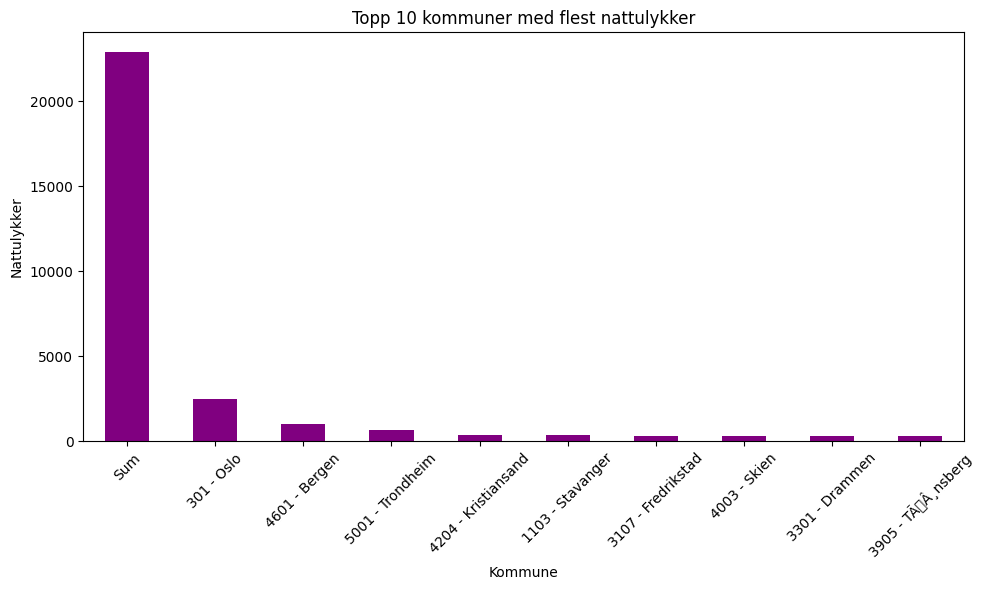

In [11]:
natt_top = df.groupby("Kommune")["Natt 00:00-06:59"].sum().sort_values(ascending=False).head(10)

natt_top.plot(kind="bar", figsize=(10,6), color="purple")
plt.title("Topp 10 kommuner med flest nattulykker")
plt.ylabel("Nattulykker")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Analyse 5: Topp 10 kommuner med flest nattulykker

**Observasjon:**
- Enkelte kommuner har et uvanlig høyt antall nattulykker.

**Tolkning:**
- Kan indikere problemområder med:
  - Nattkjøring under påvirkning (rus)
  - Dårlig belysning
  - Manglende nattbusstilbud eller kollektivtilgang

## Analyse 6: Ulykker per sesong

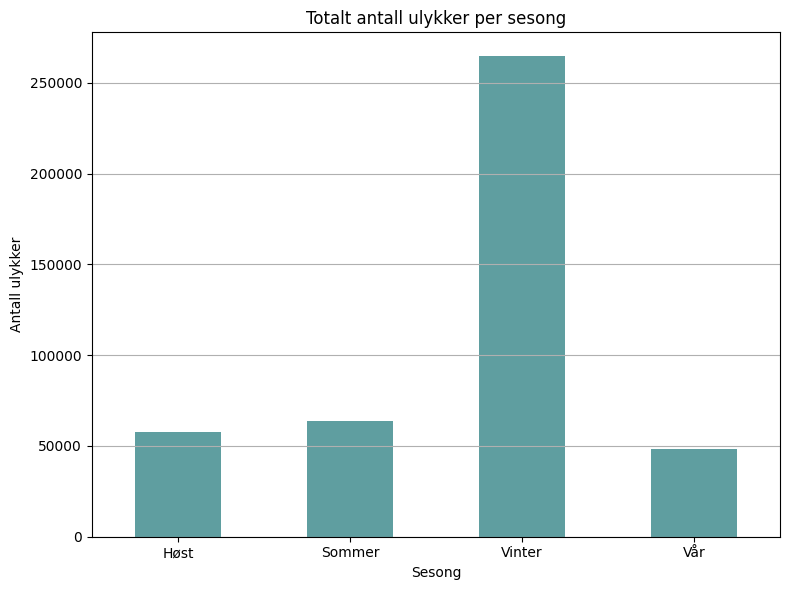

In [13]:
# Kartlegg måneder til sesonger
måned_sesong = {
    "Januar": "Vinter", "Februar": "Vinter", "Desember": "Vinter",
    "Mars": "Vår", "April": "Vår", "Mai": "Vår",
    "Juni": "Sommer", "Juli": "Sommer", "August": "Sommer",
    "September": "Høst", "Oktober": "Høst", "November": "Høst"
}
df["Sesong"] = df["Måned"].map(måned_sesong)

season_summary = df.groupby("Sesong")[time_columns].sum()
season_summary["Totalt"] = season_summary.sum(axis=1).sort_values(ascending=False)

season_summary["Totalt"].plot(kind="bar", figsize=(8,6), color="cadetblue")
plt.title("Totalt antall ulykker per sesong")
plt.ylabel("Antall ulykker")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


**Tolkning:**
- **Vinteren** har flest ulykker – sannsynligvis pga. snø, is og mørke.
- Sommeren har færrest, noe som stemmer med mindre trafikk under ferieperioder.


## 🧾 Konklusjon

Basert på analysen av ulykkesdata etter tidspunkt, måned, sesong og kommune, kan vi trekke følgende hovedfunn:

### 🚦 Viktige funn:
- **Formiddagen (09:00–14:59)** er det tidspunktet med flest registrerte ulykker – noe som kan tyde på mye hverdagsaktivitet, skoletrafikk og vareleveranser.
- **Desember og vintermånedene** har betydelig høyere ulykkestall enn andre måneder, trolig på grunn av glatte veier, dårlig sikt og økt juletrafikk.
- **Større bykommuner** som Oslo og Bergen har flest ulykker, noe som stemmer med høy trafikkmengde og befolkningstetthet.
- **Nattulykker** er færre totalt, men enkelte kommuner har uvanlig mange – som kan tyde på problemer knyttet til rus, dårlig belysning eller manglende natttransport.

### 🛡️ Anbefalinger:
- **Tiltak bør rettes mot vintermånedene**, f.eks. bedre vintervedlikehold, trafikkvarsler og kampanjer om trygg kjøring.
- Kommuner med mange **nattulykker** bør vurdere tiltak som bedre gatebelysning, økt politikontroll, og forbedret kollektivtilbud om natten.
- Mer detaljert analyse kan utføres ved å kombinere med data om **værforhold, kjønn, skadegrad og vegtilstand**.

Dette gir innsikt som kan brukes av både transportmyndigheter og kommuner for å forebygge ulykker og forbedre trafikksikkerheten i Norge.